<a href="https://colab.research.google.com/github/rpasquini/urban-econometrics/blob/master/OLS_2_Ajuste_Propiedades_Test_de_Hip%C3%B3tesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_author: Ricardo Pasquini (rpasquini@gmail.com)


In [1]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 7.1MB/s 
     |████████████████████████████████| 6.6MB 29.0MB/s 
     |████████████████████████████████| 15.4MB 200kB/s 


In [40]:
!pip install contextily
import contextily as cx

     |████████████████████████████████| 19.3MB 1.4MB/s 


In [2]:
import geopandas as gpd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Estimación del modelo lineal

Comenzaremos por replicar la estimación de los coeficientes del modelo: 

$price_i=\beta_0+\beta_1*bedrooms_i+\epsilon_i$


In [3]:
departamentos=gpd.GeoDataFrame.from_file("https://github.com/rpasquini/urban-econometrics/blob/master/data/departamentos2019amba.zip?raw=true")

In [4]:
datos=departamentos[['price', 'bedrooms']]

In [5]:
# el metodo dropna() me permite eliminar las filas que tienen algun valor missing
datos=datos.dropna()

In [6]:
Y=datos.price
X=datos.bedrooms
X=sm.add_constant(X)

In [7]:
modelo=sm.OLS(Y,X)
resultados=modelo.fit()

In [8]:
# mostramos los resultados
print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1443.
Date:                Tue, 08 Jun 2021   Prob (F-statistic):          7.68e-308
Time:                        13:04:37   Log-Likelihood:            -3.0876e+05
No. Observations:               27879   AIC:                         6.175e+05
Df Residuals:                   27877   BIC:                         6.175e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.151e+04    205.145     56.088      0.0

# Predicción

$\hat{Y}=\hat{\beta_0}+\hat{\beta_1}*X$

In [9]:
# Departamento de 2 dormitorios
11510+4253*2

20016

In [10]:
# Departamento de 2 dormitorios
resultados.params['const']+resultados.params['bedrooms']*2

20013.204472922604

In [11]:
# Predicciones para observaciones en la data
resultados.params['const']+resultados.params['bedrooms']*datos.bedrooms

0        15759.697728
2        20013.204473
4        15759.697728
43       15759.697728
45       15759.697728
             ...     
50647    20013.204473
50648    15759.697728
50650    28520.217963
50651    15759.697728
50652    20013.204473
Name: bedrooms, Length: 27879, dtype: float64

In [12]:
resultados.predict(X)

0        15759.697728
2        20013.204473
4        15759.697728
43       15759.697728
45       15759.697728
             ...     
50647    20013.204473
50648    15759.697728
50650    28520.217963
50651    15759.697728
50652    20013.204473
Length: 27879, dtype: float64

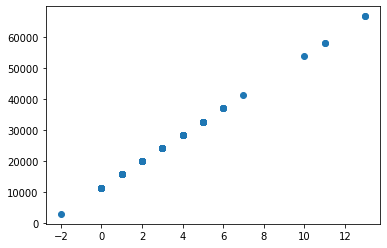

In [13]:
# Ploteamos prediccion con matplolib
plt.scatter(datos.bedrooms, resultados.predict(X))

# Error Cuadrático Medio


Recordemos que la definición del error cuadrático medio es:

$MSE=\sqrt{\frac{\sum^n_{i=1} e_i^2}{n-2}}$ donde

$e=y-\hat{y}$



Como parte de los resultados de la estimación, se puede recuperar MSE, pero ojo, lo que devuelve es el resultado al cuadrado (previo a la raiz)

In [14]:
resultados.mse_resid

243930120.92914465

Podemos corroborar esto calculando a mano el MSE

In [15]:
ypred = resultados.predict(X)
residuos=Y-ypred
rss=np.sum(residuos**2)
MSE=(rss/(resultados.nobs-2))
MSE

243930120.92914465

Tomando raiz cuadrada...

In [16]:
MSE**0.5

15618.262417091879

In [17]:
residuos2=residuos*residuos
residuos2.describe()

count    2.787900e+04
mean     2.439126e+08
std      3.686013e+09
min      3.832827e+01
25%      5.106234e+06
50%      2.513222e+07
75%      1.436833e+08
max      4.126768e+11
dtype: float64

In [18]:
residuos.describe()

count    2.787900e+04
mean     5.759983e-11
std      1.561798e+04
min     -5.769477e+04
25%     -6.013204e+03
50%     -1.759698e+03
75%      3.986796e+03
max      6.423993e+05
dtype: float64

# Propiedades de los estimadores cuando los errores son normales

El siguiente es un ejercicio que realizamos sólo con el fin de mostrar una propiedad teórica. La teoría nos dice que si los errores del modelo siguen una distribución normal, entonces esperamos que los coeficientes betas estimados sigan una distribución t-student.
A continuación vamos a ver, en unos datos creados artificialmente, que este es el caso. 
Más precisamente vamos a simular las estimacion de los coeficientes beta en presencia de errores normales.
Para ello vamos a generar datos de precios artificiales que surjan del modelo lineal más un error normal. Luego vamos a estimar el beta resultante.
Vamos a repetir este procedimiento multiples veces, y cada vez que lo hacemos vamos a guardar el beta resultante. Luego vamos a examinar la distribución de los betas. 




(array([4.000e+00, 6.500e+01, 5.260e+02, 2.760e+03, 6.775e+03, 9.195e+03,
        6.059e+03, 2.104e+03, 3.570e+02, 3.400e+01]),
 array([-71571.78184254, -58343.30883277, -45114.83582301, -31886.36281325,
        -18657.88980348,  -5429.41679372,   7799.05621604,  21027.52922581,
         34256.00223557,  47484.47524534,  60712.9482551 ]),
 <a list of 10 Patch objects>)

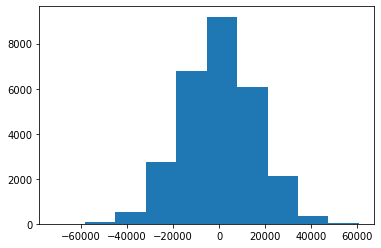

In [19]:
e_simu= np.random.normal(0, 15617, 27879)
plt.hist(e_simu)


In [20]:
def simu():
  e_simu = np.random.normal(0, 15617, 27879)
  y_simu=1.151e+04+4253.5067*datos.bedrooms+e_simu
  model_simu=sm.OLS(y_simu,X)
  resultados_simu=model_simu.fit()
  #print(resultados_simu.summary())
  #print(resultados_simu.params['bedrooms'])
  return resultados_simu.params['bedrooms']
simu()

4273.647402216233

In [21]:
betacoefs=[]
for i in range(0,200):
  beta=simu()
  betacoefs.append(beta)
print(betacoefs)


[4143.720696102293, 4149.896201151055, 4300.458314888809, 4399.021410531531, 4368.373733750301, 4178.804318340604, 4272.435376714592, 4289.671119856391, 4375.167674790619, 4176.853307148793, 4227.873501544541, 4125.772438108792, 4237.705578814373, 4339.61983338808, 4306.832112443515, 4211.782828508715, 4276.005213532239, 4258.868222160602, 4134.8937478315775, 4076.786800980605, 4215.335194316451, 4284.437498130296, 4383.949801416123, 4191.122985552123, 4174.261719757104, 4312.824552288038, 4167.038124757441, 4333.320287257482, 4206.948322092874, 4230.42060398016, 4411.668568289688, 3943.6144088738865, 4149.4131302662045, 4170.870555801329, 4369.871209623112, 4338.790803616655, 4284.398258563103, 4177.152635547583, 4191.367454753343, 4435.926637721853, 4295.693240435282, 4335.089156718947, 4184.024993623691, 4420.867175073342, 4136.144857894597, 4259.517808414548, 4232.8496182383615, 4144.9689806347, 4174.982326373463, 4133.061269296652, 4312.726255824006, 4122.244550165487, 4045.700690

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f63c2d8c0d0>]],
      dtype=object)

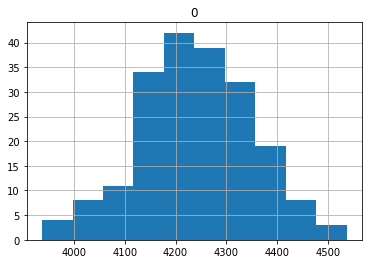

In [22]:
import pandas as pd
pd.DataFrame(betacoefs).hist()

(array([ 4.,  8., 11., 34., 42., 39., 32., 19.,  8.,  3.]),
 array([3937.88764707, 3997.70639783, 4057.5251486 , 4117.34389937,
        4177.16265013, 4236.9814009 , 4296.80015167, 4356.61890244,
        4416.4376532 , 4476.25640397, 4536.07515474]),
 <a list of 10 Patch objects>)

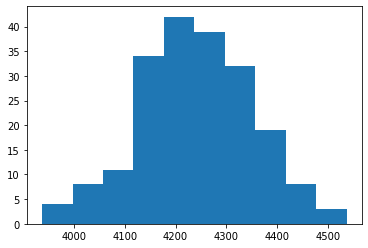

In [23]:
import matplotlib.pyplot as plt
plt.hist(betacoefs)

# ¿Cómo son los residuos (errores estimados) del modelo estimado?

## Primero analizo la normalidad de la distribución 
Inspecciono el histograma para tener una idea rápida de la distribución




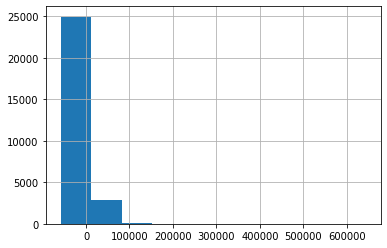

In [24]:
residuos.hist()

## Analizamos visualmente si la varianza del residuo es constante (homocedasticidad)

In [26]:
datos['residuos']=residuos

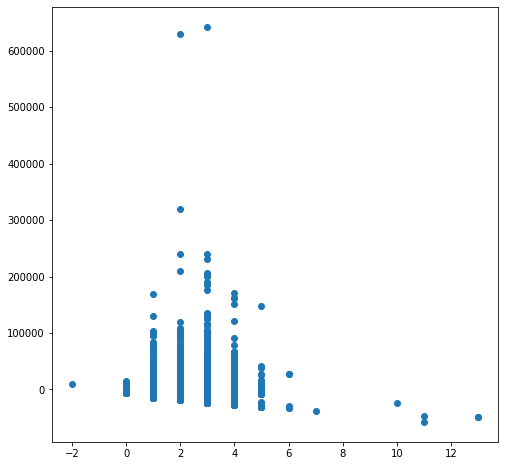

In [49]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(datos['bedrooms'], datos['residuos'], 'o', label="Data")

## Analizamos visualmente la distribución espacial en busca de correlación espacial
(más adelante implementaremos medidas específicas)

In [ ]:
plt.scatter()

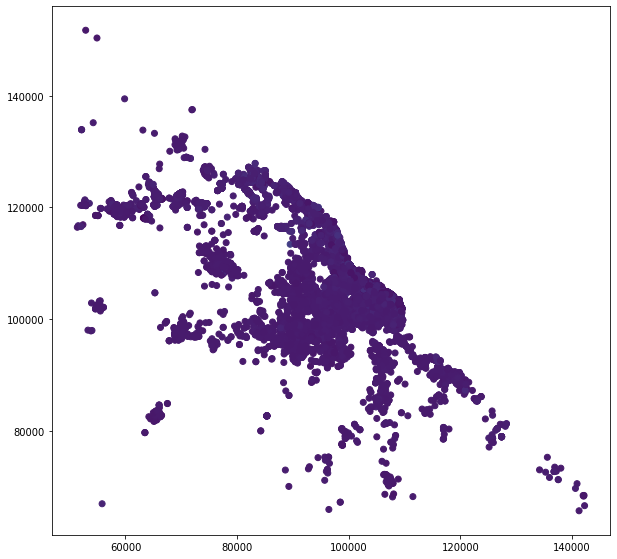

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))
departamentos.join(datos['residuos']).plot(ax=ax, column='residuos')
#ax.set_xlim(80000, 110000)
#ax.set_ylim(90000, 110000)

### Agregando capa de referencia con la librería contextily

(-6572476.256380769,
 -6451034.427907456,
 -4160802.376179422,
 -4045391.256813092)

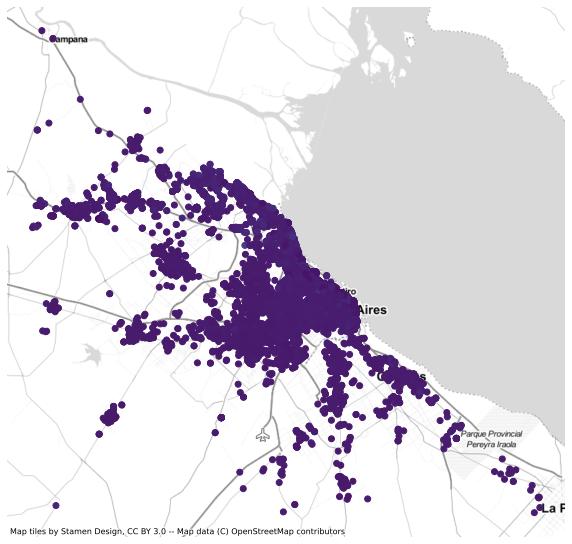

In [43]:
fig, ax = plt.subplots(figsize=(10, 10))
departamentos.join(datos['residuos']).to_crs(epsg=3857).plot(ax=ax, column='residuos')
#ax.set_xlim(80000, 110000)
#ax.set_ylim(90000, 110000)
cx.add_basemap(ax, crs=departamentos.to_crs(epsg=3857).crs.to_string(), source=cx.providers.Stamen.TonerLite)
ax.axis('off')

(-6572476.256380769,
 -6451034.427907456,
 -4160802.376179422,
 -4045391.256813092)

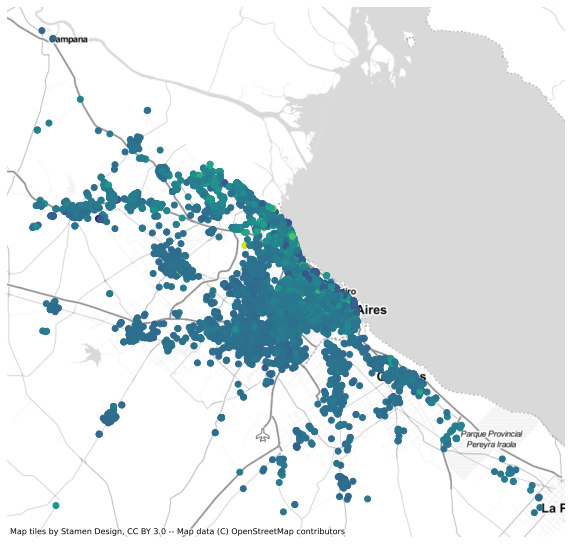

In [46]:
fig, ax = plt.subplots(figsize=(10, 10))
departamentostemp=departamentos.join(datos['residuos'])
departamentostemp.loc[departamentostemp.residuos<80000].to_crs(epsg=3857).plot(ax=ax, column='residuos')
#ax.set_xlim(80000, 110000)
#ax.set_ylim(90000, 110000)
cx.add_basemap(ax, crs=departamentos.to_crs(epsg=3857).crs.to_string(), source=cx.providers.Stamen.TonerLite)
ax.axis('off')